In [57]:
import meshio
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [60]:
mesh = meshio.read("meshes/square.msh")

nodes = mesh.points

elements = mesh.cells_dict
triangles = elements.get("triangle", [])  # Get triangles (if applicable)

In [61]:

print(mesh.field_data)  # Check available element types


{'wall_left': array([5, 1]), 'free_bottom': array([6, 1]), 'force_right': array([7, 1]), 'free_top': array([8, 1])}


In [62]:
# Extract physical group IDs for elements
physical_groups = mesh.cell_data_dict.get("gmsh:physical", {})

print(physical_groups)

{'line': array([6, 6, 7, 7, 8, 8, 5, 5])}


In [63]:
G = nx.Graph()


for i, point in enumerate(nodes):
    G.add_node(i, pos=point)

# Add edges based on element connectivity
for triangle in triangles:
    for i in range(3):
        G.add_edge(triangle[i], triangle[(i + 1) % 3])  # Connect nodes

print(G)
print(triangles)

Graph with 8 nodes and 0 edges
[]


In [52]:
target_group = "wall_left"
target_id = mesh.field_data[target_group][0]

print("Available element types:", mesh.cells_dict.keys())

for cell_type, group_ids in mesh.cell_data_dict["gmsh:physical"].items():
    mask = (group_ids == target_id)  # Find elements with the correct Physical Group ID
    elements_in_group = mesh.cells_dict[cell_type][mask]
    print(f"Elements in {target_group} ({cell_type}):", elements_in_group)

Available element types: dict_keys(['vertex', 'line', 'triangle'])
Elements in wall_left (vertex): []
Elements in wall_left (line): []
Elements in wall_left (triangle): []


In [54]:
print("Available element types:", mesh.cells_dict.keys())

Available element types: dict_keys(['vertex', 'line', 'triangle'])


In [53]:

# Find lines belonging to "wall_left"
target_id = mesh.field_data["wall_left"][0]  # Get Physical Group ID
line_mask = np.array(mesh.cell_data_dict["gmsh:physical"]["line"]) == target_id
line_elements = mesh.cells_dict["line"][line_mask]

# Extract unique node indices
wall_left_nodes = np.unique(line_elements)

# Get their coordinates
wall_left_coordinates = mesh.points[wall_left_nodes]

print(f"Nodes on 'wall_left': {wall_left_nodes}")
print(f"Coordinates of nodes on 'wall_left':\n{wall_left_coordinates}")


Nodes on 'wall_left': []
Coordinates of nodes on 'wall_left':
[]


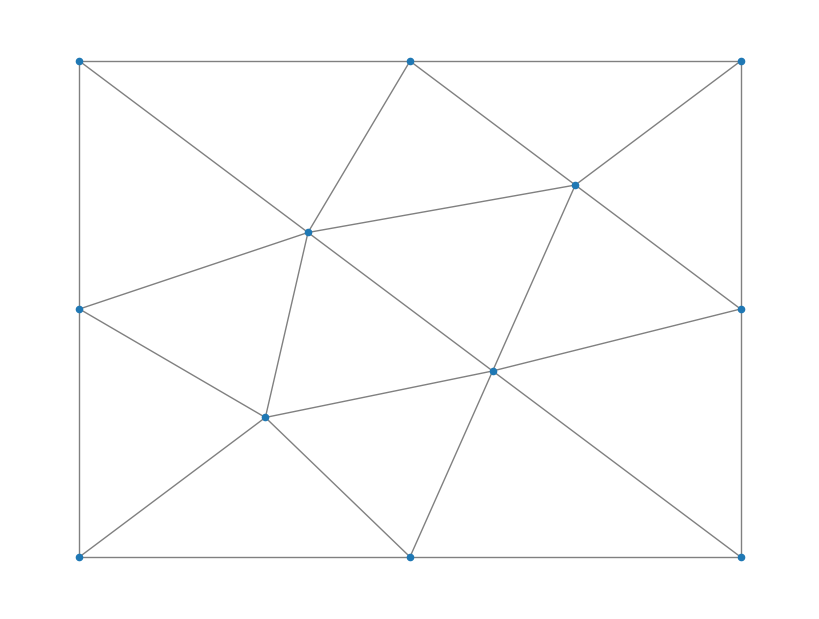

In [50]:

pos = {i: (p[0], p[1]) for i, p in enumerate(nodes)}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_size=20, edge_color="gray")
plt.show()
